In [1]:
import pandas as pd
import numpy as np

df = pd.read_pickle("apt_data_v1.pkl")

In [20]:
from benfordslaw import benfordslaw

In [3]:
df.Location = df.Location.str.lower()
df['House Type'] = df['House Type'].str.lower()

## EAST LEGON

In [4]:
east = df.query('Location.str.contains("east legon")')
east = east[east.Location.str.contains("hills") == False]
adj = df.query('Location.str.contains("adj")')
shi = df.query('Location.str.contains("shia")')
east_leg = pd.concat([east,adj,shi],axis = 0)
east_leg['Suburb'] = "East Legon"
east_leg = east_leg[east_leg.Price.str.contains("Price") == False]
east_leg = east_leg.astype({"Price":"int"})
east_leg = east_leg[east_leg.Bedrooms.str.contains("A") == False]
east_leg = east_leg[east_leg.Bedrooms.str.contains("F") == False]
east_leg = east_leg.astype({"Bedrooms":"int"})

In [5]:
east_leg.Location.count()

318

##### MIN, MAX, MEDIAN, OUTLIERS

In [6]:
east_leg.Price.describe()
east_leg.Price.min()

1950

In [7]:
IQR_east_leg = east_leg.Price.quantile(0.75) - east_leg.Price.quantile(0.25)
IQR_east_leg

1891598.75

In [8]:
low = east_leg.Price.quantile(0.25) - 1.5 * IQR_east_leg
low

-1486369.125

In [9]:
high = east_leg.Price.quantile(0.75) + 1.5 * IQR_east_leg
high

6080025.875

In [10]:
if east_leg.Price.min() > low and east_leg.Price.max() < high:
    print("There are no outliers")
else:
    print("There are outliers")

There are outliers


[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=5.89605e-06, Tstat=38.5738


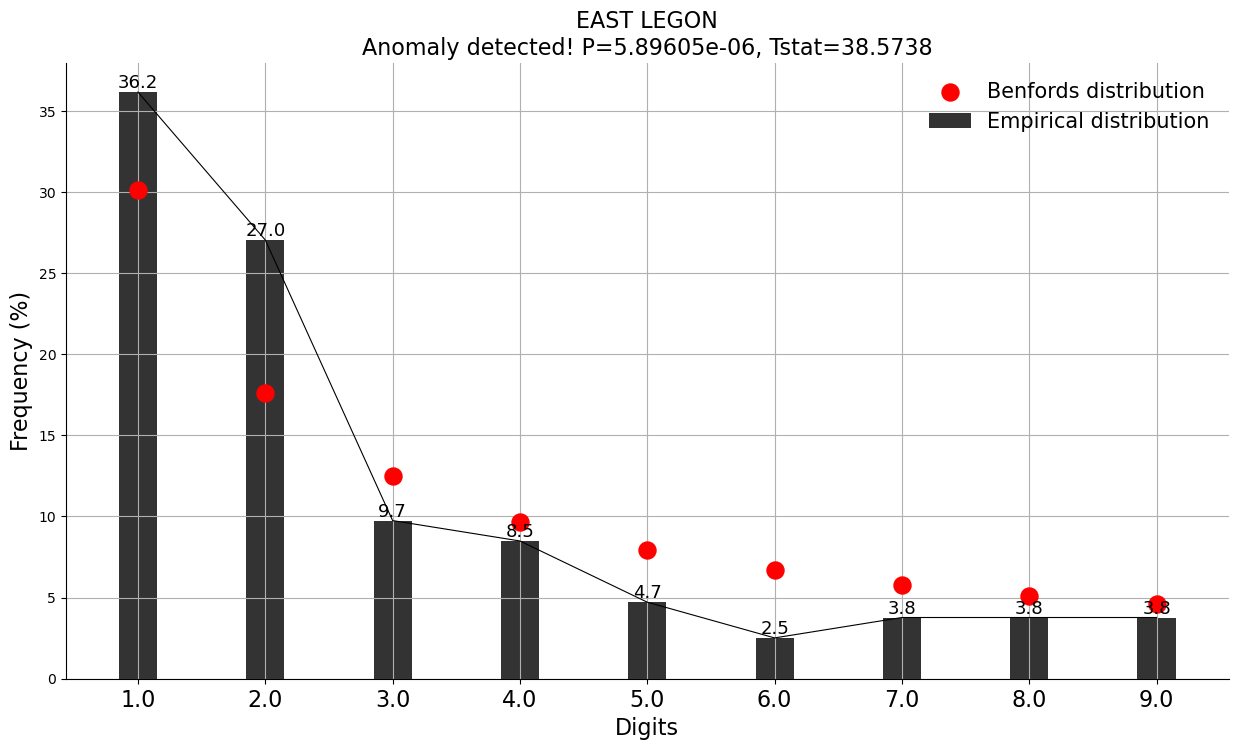

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'EAST LEGON\nAnomaly detected! P=5.89605e-06, Tstat=38.5738'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [26]:
bl = benfordslaw(alpha = 0.05)
x1 = east_leg['Price']
results = bl.fit(x1)
bl.plot(title = "EAST LEGON")

## EAST LEGON HILLS

In [11]:
east_hills = df.query('Location.str.contains("east legon")')
east_hills = east_hills.query('Location.str.contains("hills")')
lk = df.query('Location.str.contains("lake")')
east_hills = pd.concat([east_hills,lk],axis = 0)
east_hills['Suburb'] = "East Legon Hills"
east_hills = east_hills.astype({"Price":"int"})
east_hills = east_hills.astype({"Bedrooms":"int"})

In [12]:
east_hills.Location.count()

34

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0.0320584, Tstat=16.8182


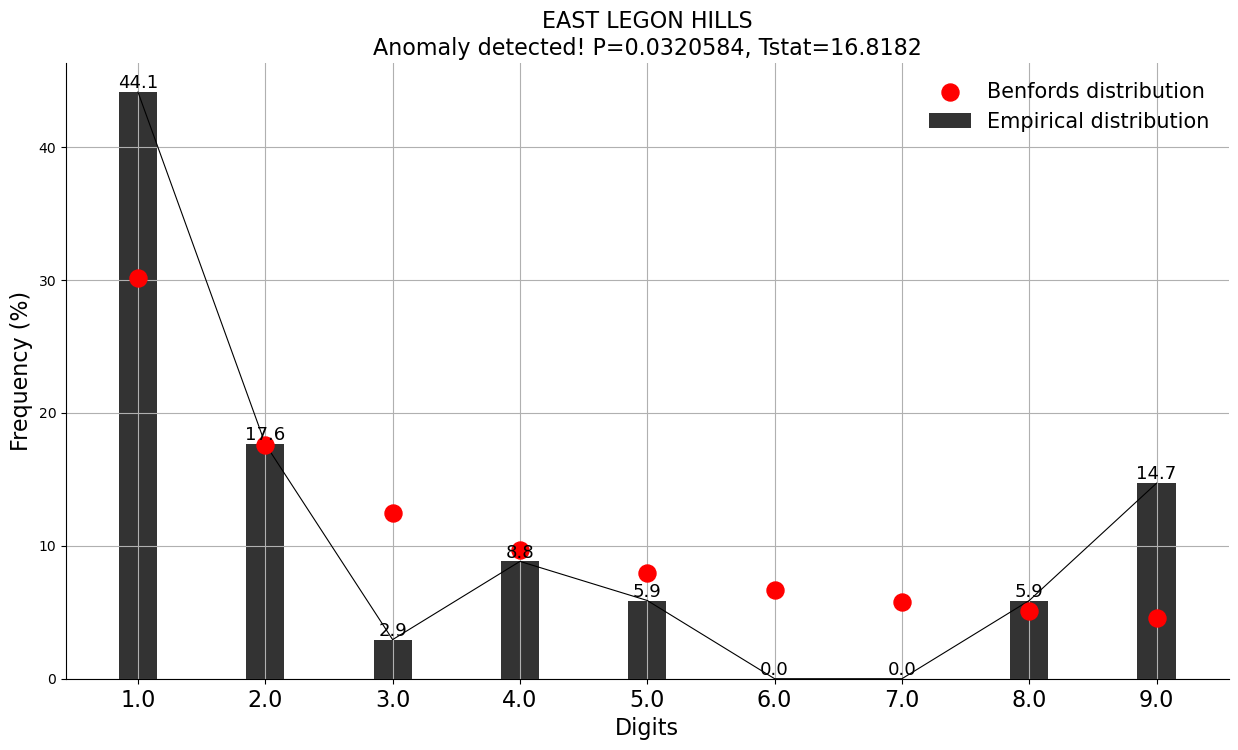

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'EAST LEGON HILLS\nAnomaly detected! P=0.0320584, Tstat=16.8182'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [27]:
bl = benfordslaw(alpha = 0.05)
x2 = east_hills['Price']
results = bl.fit(x2)
bl.plot(title = "EAST LEGON HILLS")

### CANTONMENTS

In [13]:
canto = df.query('Location.str.contains("cant")')
canto['Suburb'] = "Cantonments"
canto = canto[canto.Price.str.contains("Price") == False]
canto = canto.astype({"Price":"int"})
canto = canto[canto.Bedrooms.str.contains("A") == False]
canto = canto.astype({"Bedrooms":"int"})

/var/folders/p3/m5hh4tgj36z4r763hs22tq3h0000gp/T/ipykernel_838/1033700490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canto['Suburb'] = "Cantonments"


In [14]:
canto.Location.count()

249

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=5.87494e-11, Tstat=64.5679


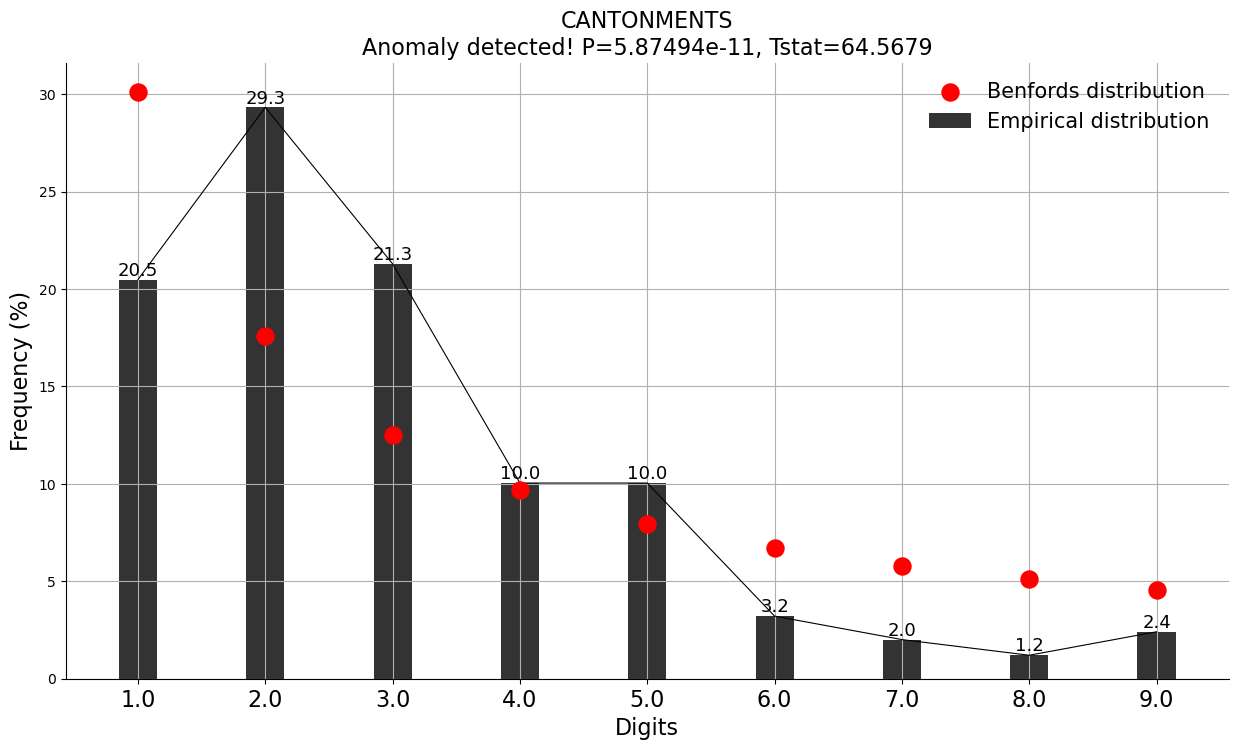

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'CANTONMENTS\nAnomaly detected! P=5.87494e-11, Tstat=64.5679'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [28]:
bl = benfordslaw(alpha = 0.05)
x3 = canto['Price']
results = bl.fit(x3)
bl.plot(title = "CANTONMENTS")

### LABONE

In [15]:
labone = df.query('Location.str.contains("lab")')
labone['Suburb'] = "Labone"
labone = labone[labone.Price.str.contains("Price") == False]
labone = labone.astype({"Price":"int"})
labone = labone[labone.Bedrooms.str.contains("F") == False]
labone = labone[labone.Bedrooms.str.contains("A") == False]

/var/folders/p3/m5hh4tgj36z4r763hs22tq3h0000gp/T/ipykernel_838/1239506033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labone['Suburb'] = "Labone"


In [16]:
labone.Location.count()

68

In [33]:
labone.Price.max()

80149850

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0.0149179, Tstat=18.9891


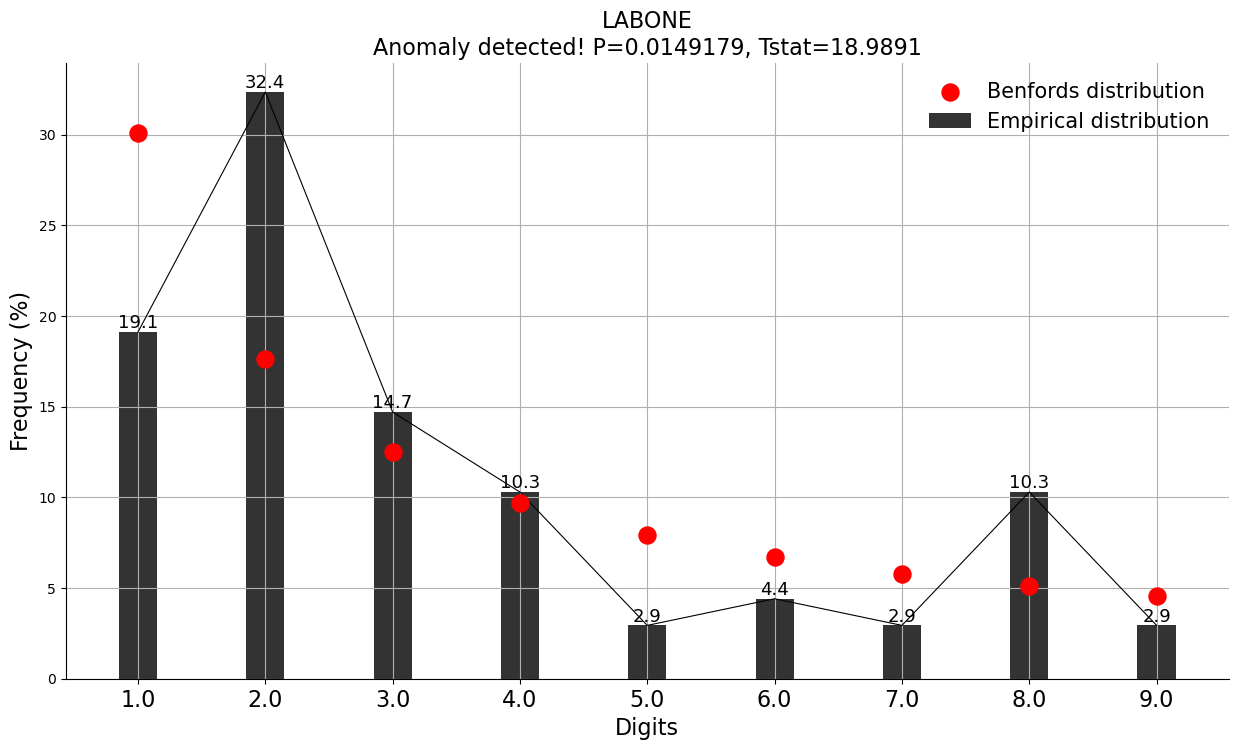

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'LABONE\nAnomaly detected! P=0.0149179, Tstat=18.9891'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [29]:
bl = benfordslaw(alpha = 0.05)
x4 = labone['Price']
results = bl.fit(x4)
bl.plot(title = "LABONE")

### AIRPORT

In [17]:
airport = df.query('Location.str.contains("airp")')
airport['Suburb'] = "Airport"
airport = airport[airport.Price.str.contains("Price") == False]
airport = airport.astype({"Price":"int"})
airport = airport[airport.Bedrooms.str.contains("A") == False]
airport = airport[airport.Bedrooms.str.contains("F") == False]
airport = airport.astype({"Bedrooms":"int"})

/var/folders/p3/m5hh4tgj36z4r763hs22tq3h0000gp/T/ipykernel_838/453823380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport['Suburb'] = "Airport"


In [18]:
airport.Location.count()

309

In [19]:
airport['House Type'].value_counts()

 apartment               234
 furnished apartment      73
 penthouseapartment        2
Name: House Type, dtype: int64

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] No anomaly detected. P=0.151502, Tstat=11.9933


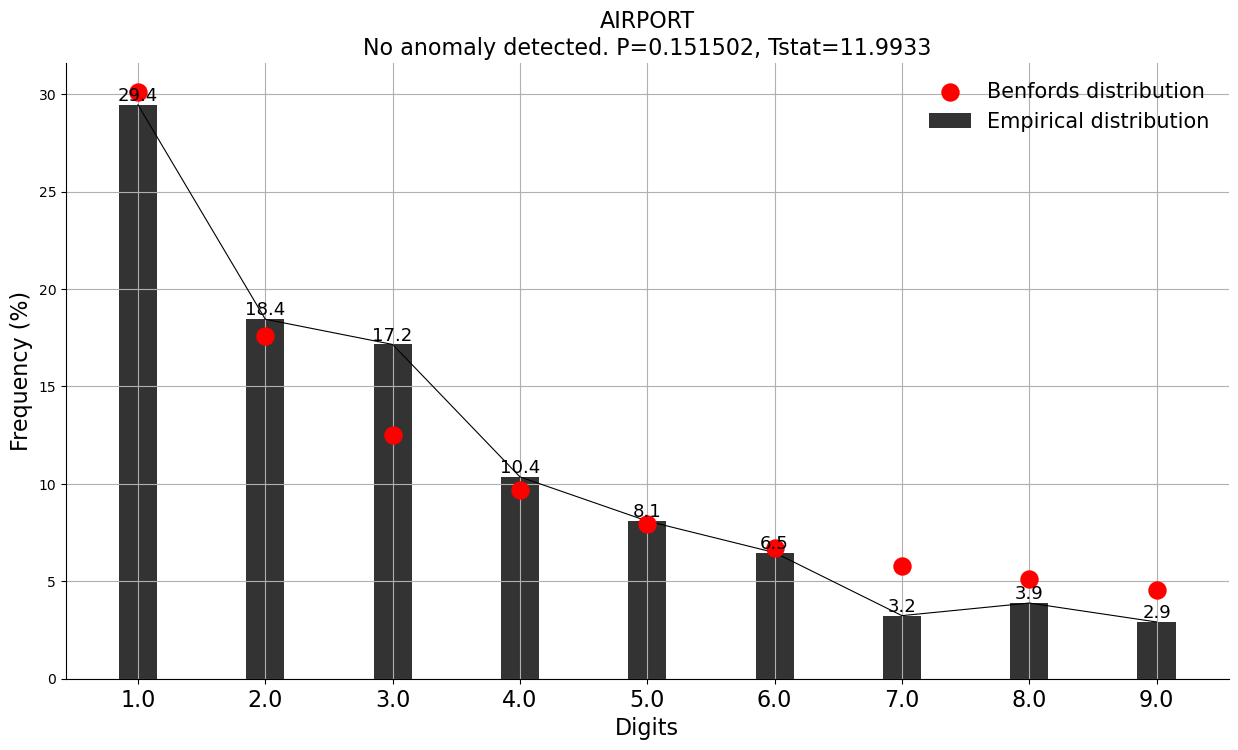

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'AIRPORT\nNo anomaly detected. P=0.151502, Tstat=11.9933'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [30]:
bl = benfordslaw(alpha = 0.05)
x5 = airport['Price']
results = bl.fit(x5)
bl.plot(title = "AIRPORT")